In [1]:
import tensorflow as tf
import numpy as np
import math
import timeit
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.constraints import max_norm
from PIL import Image

import keras.backend as K
K.set_floatx('float32')


Using TensorFlow backend.


In [6]:
path = '/home/grads/n/narendra5/Desktop/Programs/LER_machine_learning/'
model = load_model(path + 'models/' + 'nnet_test_run_1.h5')
sigma = 1.2
alpha = 0.6
Xi = 30
width = 30
space = 60
noise = 20
shift = math.floor(-25 + (width + space/2 + Xi + alpha*10 + sigma*10)%16) 


original_file = path + 'original_images/oim_' + "{:.2g}".format(sigma*1e-09) + '_' + str(alpha) + '_' + "{0:.2g}".format(Xi*1e-09) + '_' + str(width) + '_' + str(space) + '_' + str(-shift) + '.tiff'
noisy_file = path + 'noisy_images/nim_' + "{0:.2g}".format(sigma*1e-09) + '_' + str(alpha) + '_' + "{0:.2g}".format(Xi*1e-09) + '_' + str(width) + '_' + str(space) + '_' + str(-shift) + '_' + str(noise) + '.tiff'

im = np.array(Image.open(original_file))
imnoisy = np.array(Image.open(noisy_file))

im = im/256
imnoisy = (imnoisy)/256
imnoisy = imnoisy.reshape(1,1024,64,1)
impredict = model.predict(imnoisy)

imnoisy = imnoisy.reshape(1024,64)
impredict = impredict.reshape(1024,64)


mse = ((im - impredict) ** 2).mean()
print(mse)

del model

0.00187034249549


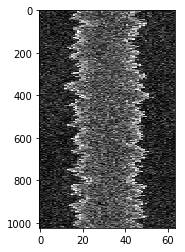

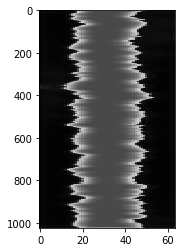

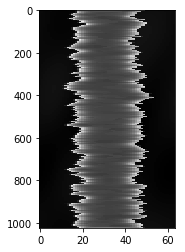

In [7]:
plt.imshow(imnoisy,cmap = 'gray',aspect= 0.1)
plt.show()

plt.imshow(impredict, cmap = 'gray', aspect= 0.1)
plt.show()

plt.imshow(im,cmap = 'gray',aspect = 0.1)
plt.show()